In [1]:
using Plots, Distributions

In [37]:
function simulate(m, n)
    # Total machines
    N = 1000;

    # Working machines at day 0
    W_0 = 990;

    # maintainance -> probability of breaking
    Pb1 = 0.001;
    Pb0 = 0.4;
    Pb(m) = Pb1*m+Pb0*(1-m);

    # probability of being repaired
    Pr = 0.5;

    # Income
    I(m) = 0.6*m + 1*(1-m);

    # Cost of repair
    C = 4;
    
    a = 0
    for i = 1:n
        B = rand(Binomial(W_0, Pb(m)));
        R = rand(Binomial(N-W_0, Pr));
        W_1 = W_0 - B + R;
        M = W_1*I(m) - R*C;
        a = a + M;
    end
    return a / n
end

simulate (generic function with 1 method)

# Exhaustive search

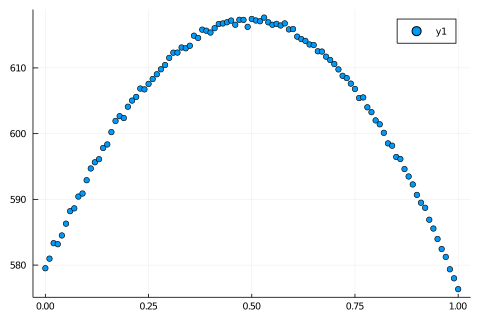

In [50]:
xs = collect(0:1e-2:1)
ys = [simulate(m, 1_000) for m in xs]
scatter(xs, ys, dpi=20)

In [51]:
xs[argmax(ys)]

0.53

# Rinott's algorithm